## 可读性

::: {.callout-tip}
### 提示词

模拟一份数据，Python 代码。代码尽可能简洁：
1. N = 11 
2. x - 收入, 取值范围 5-15w；
3. y-消费：蓝色组 y~4 + 0.4x  ；红色组 y~6+ 0.6x，两个组的 x 取值大概有 30% 左右的重叠区域
4. y ~ x 的整体关系看起来有点非线性的特征，但蓝色组和红色组组内基本上线性关系
5. 我随后会用这份数据演示模型设定的思想：可以做全样本线型模型；子样本线型模型，也可以采用 regression tree ，或者非参数估计
:::

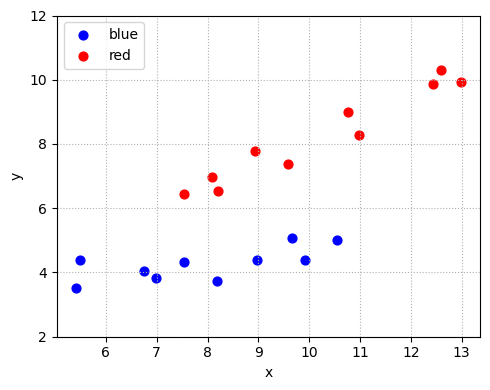

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置随机种子
np.random.seed(42)

# 样本容量
N = 20

# 分组索引：前一半为蓝色组，后一半为红色组
group = np.array(["blue"] * (N // 2) + ["red"] * (N - N // 2))

# 收入 x（单位：万元），两个组略有重叠
x_blue = np.linspace(5, 10, N // 2) + np.random.normal(0, 1, N // 2)
x_red = np.linspace(8, 14, N - N // 2) + np.random.normal(0, 1, N - N // 2)
x = np.concatenate([x_blue, x_red])

# 消费 y：
y = np.where(group == "blue",
             2 + 0.3*x + np.random.normal(0, 0.5, N),
             1 + 0.7*x + np.random.normal(0, 0.5, N))

# 打包为 DataFrame，便于建模
df = pd.DataFrame({"x": x, "y": y, "group": group})

# 画散点图
colors = {"blue": "blue", "red": "red"}
plt.figure(figsize=(5, 4))
for g in df["group"].unique():
    sub = df[df["group"] == g]
    plt.scatter(sub["x"], sub["y"], color=colors[g], label=g, s=40)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(2, 12)
plt.legend(loc="upper left")
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


::: {.callout-tip}
### 提示词

(Round 1) 画图：
基于蓝色组样本绘制一条水平线，y = mean(y)|蓝色，x 取值范围: (x_min, x_max)|蓝色；
红色组按相同方式处理；
另外，附加散点图

(Round 2) 修改代码：
采用更简洁的方式编写如下代码，现在的版本太繁琐了。
另外，legend 只需保留两个组的均值即可
:::

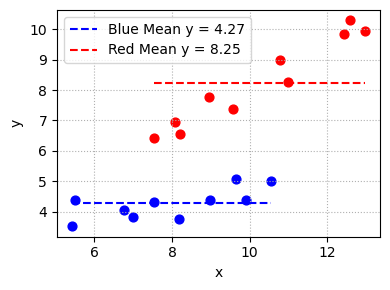

In [2]:
import matplotlib.pyplot as plt

# 分组计算均值和横轴范围
grouped = df.groupby("group")
means = grouped["y"].mean()
x_ranges = grouped["x"].agg(["min", "max"])

# 绘图
plt.figure(figsize=(4, 3))
for g, color in zip(["blue", "red"], ["blue", "red"]):
    d = df[df["group"] == g]
    plt.scatter(d["x"], d["y"], color=color, s=40)
    plt.hlines(means[g], x_ranges.loc[g, "min"], x_ranges.loc[g, "max"],
               colors=color, linestyles="--", label=f"{g.capitalize()} Mean y = {means[g]:.2f}")

# 美化
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.grid(True, linestyle=":")
plt.tight_layout()
plt.show()


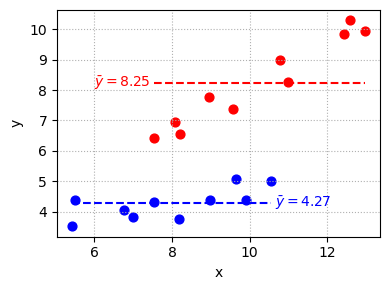

In [3]:
import matplotlib.pyplot as plt

# 分组计算均值和横轴范围
grouped = df.groupby("group")
means = grouped["y"].mean()
x_ranges = grouped["x"].agg(["min", "max"])

# 绘图
plt.figure(figsize=(4, 3))
for g, color in zip(["blue", "red"], ["blue", "red"]):
    d = df[df["group"] == g]
    plt.scatter(d["x"], d["y"], color=color, s=40)
    # 水平线
    y_mean = means[g]
    x_start, x_end = x_ranges.loc[g]
    plt.hlines(y_mean, x_start, x_end, colors=color, linestyles="--")
    # 标注均值
    if g == "red":
        plt.text(x_start - 0.1, y_mean, f"$\\bar{{y}} = {y_mean:.2f}$",
                 color=color, va='center', fontsize=10, ha='right')
    else:  # blue
        plt.text(x_end + 0.1, y_mean, f"$\\bar{{y}} = {y_mean:.2f}$",
                 color=color, va='center', fontsize=10, ha='left')

# 美化
plt.xlabel("x"); plt.ylabel("y")
plt.grid(True, linestyle=":")
plt.tight_layout()
plt.show()
